# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Valentin Kämmerer

Datum: 19.11.2023

Gruppe: 45

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Lässt sich anhand der Messung der Temperatur der Umgebung und der Temperatur eines abkühlenden Mediums über einen gewissen Zeitraum das Newtonsche Abkühlgesetz bestätigen?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.

Der Versuch besteht aus einem Behälter (ich habe wie im Bild zu sehen eine Tasse verwendet), der mit einem heißen Getränk gefüllt ist. Ich habe mich für Tee entschieden. Zusätzlich braucht man 2 Sensoren welche an den Pi angeschlossen sind und messbereit sind. Den Sensor 1 habe ich in die Tasse in den Tee reingetan und den Sensor 2 auf den Tisch gelegt. Sensor 1 misst also über einen Zeitraum die Temperatur des Tees, Sensor 2 die Umgebungstemperatur. Bevor ich die Messung gestartet habe, habe ich erstmal ca. 1 Minute gewartet bis die Sensoren sich an die Temperaturen angepasst haben. Dann habe ich die Messung gestartet. Gemessen habe ich über einen Zeitraum von 10 Minuten, dann habe ich die Messung beendet und die Messdaten wurden abgespeichert.

<img src="figures/Versuch 2.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib
import h5py as h5

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
hdf5_path = "data/newton_measurement_data/newton_measurement_data.h5"
measurement_data_path = "data/newton_measurement_data"
# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.
f = h5.File(hdf5_path, 'r')
g = f["RawData"]
RawData = g["RawData"]
created = f.attrs["created"]
experiment = f.attrs["experiment"]
group_number = f.attrs["group_number"]
authors = f.attrs["authors"]
uuids = list(RawData.keys())
sensor_1_path = "RawData/RawData/"+uuids[0]
sensor_2_path = "RawData/RawData/"+uuids[1]
sensor_1 = f[sensor_1_path]
sensor_2 = f[sensor_2_path]
temp_sensor_1 = list(sensor_1["temperature"])
temp_sensor_2 = list(sensor_2["temperature"])
time_sensor_1 = list(sensor_1["time step"])
time_sensor_2 = list(sensor_2["time step"])

# DONE #

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

Text(0, 0.5, 'Temperaturdifferenz in °C')

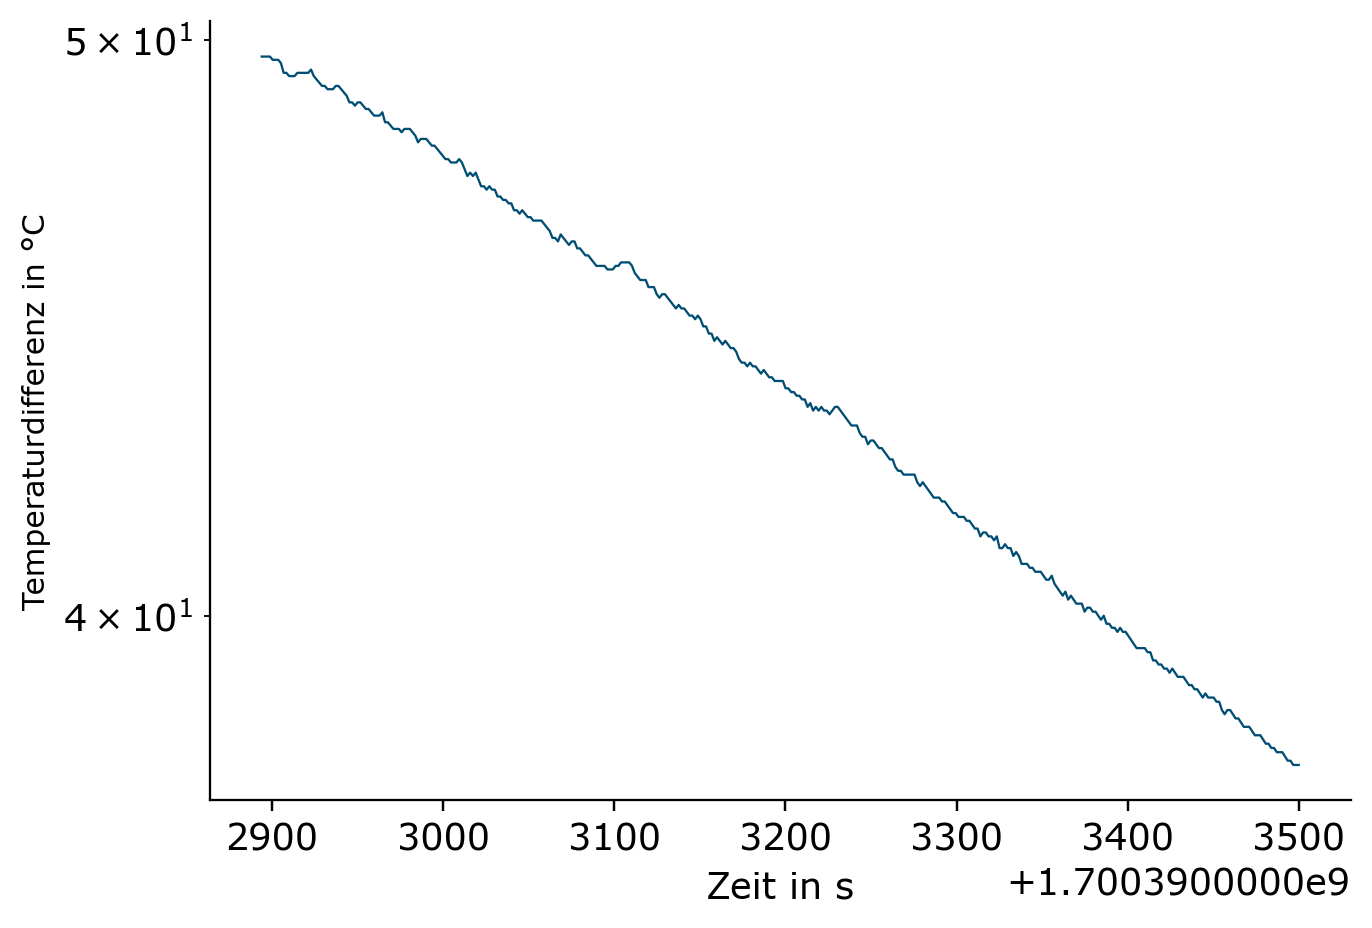

In [4]:
# TODO: Use the temperature and time data for plotting
fig = plt.figure()
temp_sensors = []
for i in range(len(temp_sensor_1)):
        temp_sensors.append(temp_sensor_1[i]-temp_sensor_2[i])

plt.semilogy(time_sensor_1, temp_sensors)
plt.xlabel("Zeit in s")
plt.ylabel("Temperaturdifferenz in °C", fontsize = "small")
# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [5]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = temp_sensor_1[0]
T_2 = temp_sensor_1[-1]
K = np.polyfit(time_sensor_1, temp_sensor_1-T_2,0)

print("T_1 =", T_1)
print("T_2 =", T_2)

# DONE #

T_1 = 74.8125
T_2 = 60.5


#### (iV) Ergebnis

In [6]:
# TODO: Print result
print("K =", K)

# DONE #

K = [6.68717018]


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Newtonsche Abkühlungsgesetz besagt, dass die Änderungsrate der Temperatur eines Mediums (zeitlich, also im Moment), proportional zur Differenz der Abkühlrate des Mediums und Umgebungstemperatur ist. Der Fakor K ist da ein Proportionalitätsfaktor, welcher immer größer null ist. Ich habe für K ca. 6.687 raus, was ein realistischer Wert ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich habe beim Versuch gelernt, mit Sensoren zu arbeiten, damit Messungen durchzuführen und die Messdaten so abzuspeichern, dass sie geordnet sind und zugänglich. Zusätzlich habe ich gelernt über UUIDs alles eindeutig festzulegen, sodass alles individuell abrufbar ist ohne dass Verwechslungen entstehe. Am Ende konnte man mit den gewonnenen Messdaten den Koeffizient K des Newtonschen Abkühlungsgesetztes bestimmen. Anhand des Plots der Messdaten ist die Abkühlung anhand der Differenz von der Temperatur des Tees zur Umgegbungstemperatur über der Zeit gut zu erkennen. 